### European up-and-in barrier call option for Wesfarmers Limited (WES)
**Information for purchase:**  
Strike Price = $80.00  
In-Barrier Level = $100.00  
Expires = 15th September 2027  
#### Step 1: Import Packages  


In [6]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scipy
%pip install yfinance
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.lines import Line2D
import yfinance as yf

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Step 2: Monte Carlo Simulation

In [ ]:
def up_and_in_barrier_call(S0, K, T, r, sigma, B, M=10000, N=252, random_seed=None):
    # Where:
    # S0: initial stock price
    # K: strike price
    # T: time to maturity in years
    # rf: risk-free interest rate
    # sigma: volatility
    # B: barrier level
    # M: number of paths
    # N: number of time steps
    # Seed for random number generator
    if random_seed is not None:
        np.random.seed(random_seed)

    # Time step
    dt = T / N

    # Discount factor for present value
    discount_factor = np.exp(-r * T)

    # Simulate M paths of GBM
    S = np.zeros((N + 1, M))
    S[0] = S0
    for t in range(1, N + 1):
        Z = np.random.normal(0, 1, M)  # Standard normal random variables
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Check if the barrier is breached
    breached = np.any(S > B, axis=0)

    # Calculate payoffs for paths that breach the barrier
    payoffs = np.where(breached, np.maximum(S[-1] - K, 0), 0)

    # Calculate the option price
    option_price = discount_factor * np.mean(payoffs)
    return option_price

### Step 3: Determine Initial Constants

In [19]:
# Initial stock price using yfinance
ticker = yf.Ticker("WES.AX")
data = ticker.history(start="2025-05-16", end="2025-05-17")
S0 = data["Close"].iloc[0]
print(f"S0 (initial price) set to: {S0}")

K = 80
T = 2.335  # Years (from 2025-05-16 to 2027-09-15)

# Last risk-free rate before 16 May 2025
rf = yf.Ticker("^IRX")
data = rf.history(end="2025-05-16") # Get data before 16 May 2025
last_rf_rate = data["Close"].iloc[-1] / 100  # Convert from % to decimal
print(f"Last risk-free rate before 16 May 2025: {last_rf_rate:.4%}")

#Volatility calculation
wes = yf.Ticker("WES.AX")
data = wes.history(start="2024-05-16", end="2025-05-16")  # 1 year of data
data['Daily Return'] = data['Close'].pct_change() # Calculate daily returns
returns = data['Daily Return'].dropna()
daily_volatility = returns.std() # Standard deviation of daily returns
annual_volatility = daily_volatility * np.sqrt(252) # Annualised volatility
print(f"Annualized volatility for WES: {annual_volatility:.4%}")

B = 100
M = 10000
N = 252

barrier_call_price = up_and_in_barrier_call(S0, K, T, last_rf_rate, annual_volatility, B, M, N=252, random_seed=42)
print(f"Up-and-In Barrier Call Option Price: ${barrier_call_price:.2f}")

S0 (initial price) set to: 82.55999755859375
Last risk-free rate before 16 May 2025: 4.2320%
Annualized volatility for WES: 20.8823%
Up-and-In Barrier Call Option Price: $14.85


#### Therefore:  
S0 = $82.56  
K = $80  
T = 2.335  
rf = 4.23%  
sigma = 20.88%  
B = $100  
M = 10000  
Call Option Price = $14.85
  
### Step 4: Visualise

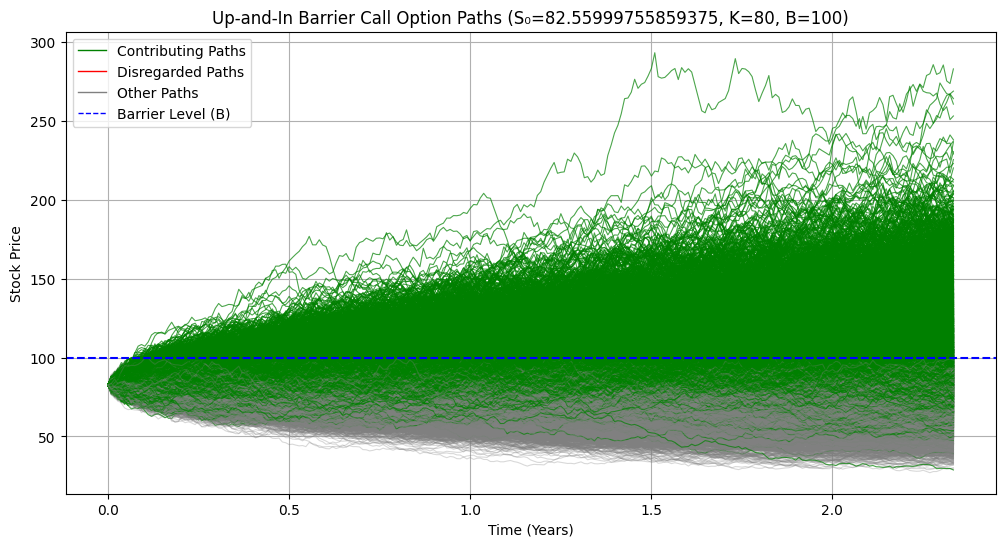

In [ ]:
def visualize_up_and_in_barrier_call(S0, K, T, r, sigma, B, M=100, N=252, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    dt = T / N  # Define the time step

    # Time points
    t = np.linspace(0, T, N + 1)

    # Simulate M paths of GBM
    S = np.zeros((N + 1, M))
    S[0] = S0
    for i in range(1, N + 1):
        Z = np.random.normal(0, 1, M)  # Standard normal random variables
        S[i] = S[i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Determine which paths are knocked out
    breached = np.any(S > B, axis=0)

    # Determine which paths contribute to the option value
    in_the_money = (S[-1] > K) & breached

    